In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

df = pd.read_csv(r"exoplanet_catalogue.csv")

column_list = df.columns.tolist()
for i in range(len(column_list)):
    print(f"{i}: {column_list[i]}", end = "\n")

print(len(df))

0: name
1: planet_status
2: mass
3: mass_error_min
4: mass_error_max
5: mass_sini
6: mass_sini_error_min
7: mass_sini_error_max
8: radius
9: radius_error_min
10: radius_error_max
11: orbital_period
12: orbital_period_error_min
13: orbital_period_error_max
14: semi_major_axis
15: semi_major_axis_error_min
16: semi_major_axis_error_max
17: eccentricity
18: eccentricity_error_min
19: eccentricity_error_max
20: inclination
21: inclination_error_min
22: inclination_error_max
23: angular_distance
24: discovered
25: updated
26: omega
27: omega_error_min
28: omega_error_max
29: tperi
30: tperi_error_min
31: tperi_error_max
32: tconj
33: tconj_error_min
34: tconj_error_max
35: tzero_tr
36: tzero_tr_error_min
37: tzero_tr_error_max
38: tzero_tr_sec
39: tzero_tr_sec_error_min
40: tzero_tr_sec_error_max
41: lambda_angle
42: lambda_angle_error_min
43: lambda_angle_error_max
44: impact_parameter
45: impact_parameter_error_min
46: impact_parameter_error_max
47: tzero_vr
48: tzero_vr_error_min
49: tze

In [ ]:
# mass, radius, orbital period, semi major axis, eccentricity, inclination, discovered, omega, star_distance, star_mass, star_radius, star_age, star_teff

In [3]:
df2 = df.dropna(subset=['detection_type']).copy()
unique_names_freq = df2['detection_type'].value_counts()
print("\nUnique Names with Frequencies:")
print(unique_names_freq)


Unique Names with Frequencies:
detection_type
Primary Transit                         4491
Radial Velocity                         1137
Imaging                                  932
Microlensing                             313
Timing                                   160
Radial Velocity, Astrometry               99
Imaging, Astrometry                       48
Astrometry                                47
Imaging, Other                            46
Other                                     42
TTV                                       32
Timing, Kinematic                         10
Radial Velocity, Primary Transit           7
Primary Transit, Radial Velocity           7
Timing, Other                              6
Imaging, Other, Kinematic                  5
Imaging, Kinematic                         5
Radial Velocity, Imaging                   4
Astrometry, Radial Velocity                2
Primary Transit, TTV                       2
Astrometry, Radial Velocity, Imaging       1
Other, I

In [4]:
# Primary Transit
# Radial Velocity
# Imaging
# Micorlensing
# Timing
# Astrometry

In [5]:
c = 0
for i,row in df2.iterrows():
    if 'Microlensing' in row['detection_type']:
        c += 1

print(c)

313


In [6]:
df2 = df.dropna(subset=['temp_measured','temp_calculated']).copy()
print(len(df2))

for _,row in df2.iterrows():
    print(f"{row['name']} \t {row['temp_calculated']} \t {row['temp_measured']}")

12
DENIS J0255-4700 	 1290.0 	 1300.0
GJ 367  b 	 1416.0 	 1365.0
HD 130948 C 	 1870.0 	 1851.0
HIP 65426 b 	 1450.0 	 1560.0
HIP 77900 b 	 2400.0 	 2602.0
Kepler-13 Ab 	 2550.0 	 2750.0
TRAPPIST-1 b 	 400.1 	 503.0
TYC 9486-927-1 b 	 1663.0 	 1800.0
USco 1610-1913 (AB)b 	 2400.0 	 2542.0
WASP-100 Ab 	 2099.0 	 2710.0
WASP-189 Ab 	 3353.0 	 3435.0
WASP-33 Ab 	 2782.0 	 2815.0


In [7]:
def H_a(row):
    """
    gives the alternate hypothesis
    """
    R_star, r, T_star, mass, radius = row['star_radius']* 6.957e+8, row['semi_major_axis']* 1.496e+11, row['star_teff'], row['mass'], row['radius']
        
    return 0


def temp_model(row):
    """
    Calculate the equilibrium temperature of a planet based on stellar parameters and distance.

    Parameters:
    -----------
    row: a row containing information of an exoplanet from the esa exoplanet catalog

    Returns:
    --------
    float
        The equilibrium temperature of the planet (in Kelvin).
    """
    R_star, r, T_star = row['star_radius']* 6.957e+8, row['semi_major_axis']* 1.496e+11, row['star_teff']
    sigma = 5.670374419e-8 # Stephan-Boltzman constant in SI
    Ab = 0.3             
    return (((1-Ab)/4) * (R_star/r)**2 * T_star**4 /  sigma) ** 0.25 + H_a(row)



In [8]:
sigma = 5.670374419e-8 # Stephan-Boltzman constant in SI

jup = (((1-0.503)/4) * (696340e3/7.784774e+11)**2 * 5772 **4 /  sigma) ** 0.25

print(jup)

6641.79022475033


In [9]:
# df2 = df.dropna(subset=['temp_measured','star_radius','semi_major_axis','star_teff','geometric_albedo']).copy()
# print(len(df2))


In [10]:
# dataframe with measured temps of planets
df2 = df.dropna(subset=['temp_measured','star_radius','semi_major_axis','star_teff']).copy()


# Add the "model_temperature" column using the temp_model function
df2.loc[:,'model_temp'] = df2.apply(lambda row: temp_model(row), axis=1)


# Initialize a list to hold table rows
table_data = []

c = 0
for _, row in df2.iterrows():
    # if row['mass'] > 10 / 317.906:  # rocky proxy
    #     continue
    # p_err = np.abs((row['temp_measured'] - row['model_temp']) / row['temp_measured'] * 100 

    # if row['semi_major_axis'] < 10:
    #     continue

    if not np.isnan(row['model_temp']):
        # Calculate percentage error
        p_err = np.abs((row['temp_measured'] - row['model_temp']) / row['temp_measured'] * 100)
        # if p_err > 50:
        #     continue
        c += 1
        # Append data to the table
        table_data.append([
            row['name'],
            f"{row['temp_measured']:.2f}",
            f"{row['model_temp']:.2f}",
            f"{p_err:.2f}%",
            f"{row['semi_major_axis']:.2f}",
            f"{row['mass']:.4f}",
            row['star_sp_type'],
            f"{row['star_radius']:.2f}",
            f"{row['star_teff']:.2f}",
            f"{row['star_distance']:.2f}",
            f"{row['molecules']}",
            f"{row['geometric_albedo']}",
        ])

# Define headers
headers = [
    "Name",
    "Measured Temp (K)",
    "Model Temp (K)",
    "Error (%)",
    "Semi-Major Axis",
    "Mass",
    "Star Type",
    "Star Radius",
    "Star Temp (K)",
    "star_distance",
    "molecules",
    "geometric_albedo"
]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

print(f"displayed {c} rows")

+----------------------+---------------------+------------------+-------------+-------------------+--------+-------------+---------------+-----------------+-----------------+-------------------------------------------------------------+--------------------+
| Name                 |   Measured Temp (K) |   Model Temp (K) | Error (%)   |   Semi-Major Axis |   Mass | Star Type   |   Star Radius |   Star Temp (K) |   star_distance | molecules                                                   |   geometric_albedo |
+======================+=====================+==================+=============+===================+========+=============+===============+=================+=================+=============================================================+====================+
| 1RXS 1609 b          |             1800.00 |           742.23 | 58.77%      |            330.00 |  14.00 | K7V         |          1.35 |         4060.00 |          145.00 | CO, H2O, K                                         

In [11]:
# Initialize a list to hold table rows
table_data = []

c = 0
for _, row in df2.iterrows():
    # if row['mass'] > 10 / 317.906:  # rocky proxy
    #     continue
    # p_err = np.abs((row['temp_measured'] - row['model_temp']) / row['temp_measured'] * 100 

    # if row['semi_major_axis'] < 10:
    #     continue

    if not np.isnan(row['model_temp']):
        # Calculate percentage error
        p_err = np.abs((row['temp_measured'] - row['model_temp']) / row['temp_measured'] * 100)
        if p_err > 80:
            continue
        c += 1
        # Append data to the table
        table_data.append([
            row['name'],
            f"{row['temp_measured']:.2f}",
            f"{row['model_temp']:.2f}",
            f"{p_err:.2f}%",
            f"{row['semi_major_axis']:.2f}",
            f"{row['mass']:.4f}",
            f"{row['star_radius']:.2f}",
            f"{row['star_teff']:.2f}",
        
        ])

# Define headers
headers = [
    "Name",
    "Measured Temp (K)",
    "Model Temp (K)",
    "Error (%)",
    "Semi-Major Axis",
    "Mass",
    "Star Radius",
    "Star Temp (K)",
]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

print(f"displayed {c} rows")

+--------------------+---------------------+------------------+-------------+-------------------+--------+---------------+-----------------+
| Name               |   Measured Temp (K) |   Model Temp (K) | Error (%)   |   Semi-Major Axis |   Mass |   Star Radius |   Star Temp (K) |
+====================+=====================+==================+=============+===================+========+===============+=================+
| 1RXS 1609 b        |             1800.00 |           742.23 | 58.77%      |            330.00 |  14.00 |          1.35 |         4060.00 |
+--------------------+---------------------+------------------+-------------+-------------------+--------+---------------+-----------------+
| 2MASS J0219-39 b   |             1683.00 |           364.34 | 78.35%      |            156.00 |  13.90 |          0.27 |         3064.00 |
+--------------------+---------------------+------------------+-------------+-------------------+--------+---------------+-----------------+
| 2MASS J0437

In [12]:
# Initialize a list to hold table rows
table_data = []

c = 0
for _, row in df2.iterrows():

    if not np.isnan(row['model_temp']):
        # Calculate percentage error
        p_err = np.abs((row['temp_measured'] - row['model_temp']) / row['temp_measured'] * 100)
        if row['semi_major_axis'] < 1:
            continue

        c += 1
        # Append data to the table
        table_data.append([
            row['name'],
            f"{row['temp_measured']:.2f}",
            f"{row['model_temp']:.2f}",
            f"{p_err:.2f}%",
            f"{row['semi_major_axis']:.2f}",
            f"{row['mass']:.4f}",
            row['star_sp_type'],
            f"{row['star_radius']:.2f}",
            f"{row['star_teff']:.2f}",
            f"{row['star_distance']:.2f}",
            f"{row['molecules']}",
        ])

# Define headers
headers = [
    "Name",
    "Measured Temp (K)",
    "Model Temp (K)",
    "Error (%)",
    "Semi-Major Axis",
    "Mass",
    "Star Type",
    "Star Radius",
    "Star Temp (K)",
    "star_distance",
    "molecules"
]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

print(f"displayed {c} rows")

+----------------------+---------------------+------------------+-------------+-------------------+--------+-------------+---------------+-----------------+-----------------+-------------+
| Name                 |   Measured Temp (K) |   Model Temp (K) | Error (%)   |   Semi-Major Axis |   Mass | Star Type   |   Star Radius |   Star Temp (K) |   star_distance | molecules   |
+======================+=====================+==================+=============+===================+========+=============+===============+=================+=================+=============+
| 1RXS 1609 b          |             1800.00 |           742.23 | 58.77%      |            330.00 |  14.00 | K7V         |          1.35 |         4060.00 |          145.00 | CO, H2O, K  |
+----------------------+---------------------+------------------+-------------+-------------------+--------+-------------+---------------+-----------------+-----------------+-------------+
| 2MASS J0219-39 b     |             1683.00 |         

In [13]:
# Initialize a list to hold table rows
complete_table_data = []

sr, sma, st = [],[],[]


c = 0
for _, row in df2.iterrows():
    # if row['mass'] > 10 / 317.906:  # rocky proxy
    #     continue
    # p_err = np.abs((row['temp_measured'] - row['model_temp']) / row['temp_measured'] * 100 

    # if row['semi_major_axis'] < 10:
    #     continue

    if not np.isnan(row['model_temp']):
        # Calculate percentage error
        p_err = np.abs((row['temp_measured'] - row['model_temp']) / row['temp_measured'] * 100)
        if row['star_teff'] > 40000:
            continue

        c += 1
        # Append data to the table
        complete_table_data.append([
            row['name'],
            row['temp_measured'],
            row['model_temp']   ,
            p_err,
            row['semi_major_axis'],
            row['mass']           ,
            row['star_sp_type'],
            row['star_radius']  ,
            row['star_teff']    ,
            row['star_distance'],
            row['molecules'],
        ])

        sr .append(row['star_radius'])
        sma.append(row['semi_major_axis'])
        st .append(row['star_teff']) 

# Define headers
headers = [
    "Name",
    "Measured Temp (K)",
    "Model Temp (K)",
    "Error (%)",
    "Semi-Major Axis",
    "Mass",
    "Star Type",
    "Star Radius",
    "Star Temp (K)",
    "star_distance",
    "molecules"
]

# Print the table
print('sort by error')
sorted_complete_table_data = sorted(complete_table_data, key = lambda x: x[3], reverse=True)
print(tabulate(sorted_complete_table_data, headers=headers, tablefmt="grid", floatfmt=".2f"))

print(f"displayed {c} rows")

sort by error
+----------------------+---------------------+------------------+-------------+-------------------+--------+-------------+---------------+-----------------+-----------------+-------------------------------------------------------------+
| Name                 |   Measured Temp (K) |   Model Temp (K) |   Error (%) |   Semi-Major Axis |   Mass | Star Type   |   Star Radius |   Star Temp (K) |   star_distance | molecules                                                   |
+======================+=====================+==================+=============+===================+========+=============+===============+=================+=================+=============================================================+
| GJ 367  b            |             1365.00 |         81926.55 |     5901.95 |              0.01 |   0.00 | M1          |          0.46 |         3522.00 |            9.41 | nan                                                         |
+----------------------+--------------

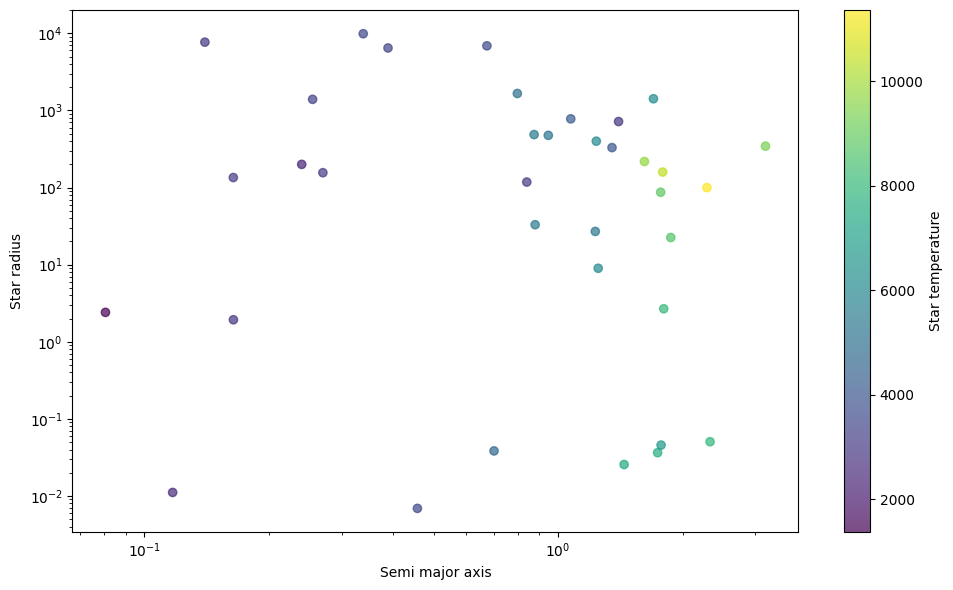

In [14]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(sr, sma, c=st, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Star temperature')
plt.xlabel('Semi major axis')
plt.ylabel('Star radius')
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()